### Download and Prepare the Dataset

In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVYKVTK/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVYKVTK/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVYKVTK/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']
train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

### Build and Compile the Model

In [3]:
import tensorflow as tf
import numpy as np

batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'lstm output units: {lstm_dim}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 16
lstm output units: 8


In [4]:
random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array: {random_input.shape}')

shape of input array: (1, 20, 16)


In [5]:
lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f'shape of lstm output(return_sequences=False): {result.shape}')

shape of lstm output(return_sequences=False): (1, 8)


In [6]:
lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences=True): {result.shape}')

shape of lstm output(return_sequences=True): (1, 20, 8)


In [7]:
import tensorflow as tf

embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation= 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

In [9]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the Model

In [10]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 66s 579ms/step - loss: 0.5496 - accuracy: 0.7032 - val_loss: 0.5308 - val_accuracy: 0.7806
Epoch 2/10
98/98 [==============================] - 49s 497ms/step - loss: 0.4575 - accuracy: 0.8050 - val_loss: 0.5377 - val_accuracy: 0.7571
Epoch 3/10
98/98 [==============================] - 47s 472ms/step - loss: 0.3859 - accuracy: 0.8404 - val_loss: 0.4170 - val_accuracy: 0.8135
Epoch 4/10
98/98 [==============================] - 42s 426ms/step - loss: 0.2784 - accuracy: 0.8930 - val_loss: 0.4051 - val_accuracy: 0.8376
Epoch 5/10
98/98 [==============================] - 43s 433ms/step - loss: 0.2307 - accuracy: 0.9148 - val_loss: 0.4259 - val_accuracy: 0.8215
Epoch 6/10
98/98 [==============================] - 41s 418ms/step - loss: 0.1897 - accuracy: 0.9312 - val_loss: 0.4219 - val_accuracy: 0.8353
Epoch 7/10
98/98 [==============================] - 40s 407ms/step - loss: 0.3045 - accuracy: 0.8670 - val_loss: 0.5337 - val_accuracy: 0.7567

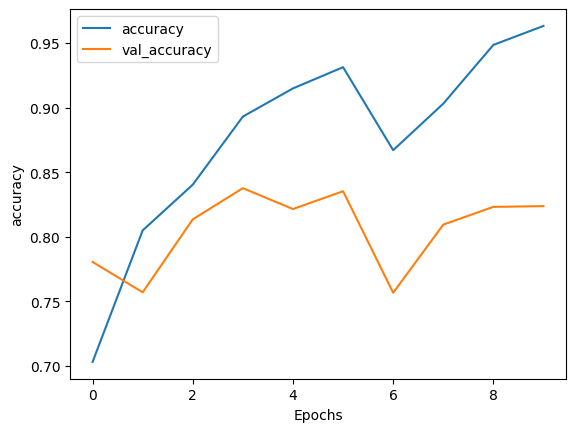

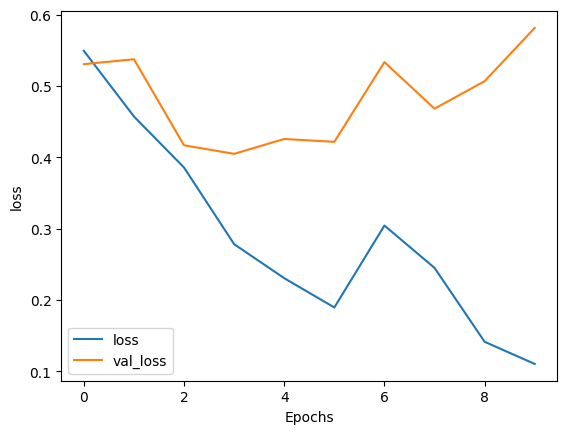

In [11]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")